# <center> Lista 12 - Aprendizado de Máquina</center>

**Aluno(a):** Marianna de Pinho Severo <br>
**Matrícula:** 374856 <br>
**Professor(a):** Regis Pires

Nesta lista, exercitaremos os conceitos de árvore de decisão, boosting e aprendizado não supervisionado.

### Passo 01: Importar bibliotecas

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.cluster import KMeans,DBSCAN
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
# SciPy hierarchical clustering
from scipy.cluster import hierarchy
# library of math
import math
import scipy

### Passo 02: Carregar os dados
Nessa lista, utilizaremos dois datasets: o [Wisconsin Diagnostic Breast Cancer (WDBC)](https://www.google.com/url?q=https%3A%2F%2Farchive.ics.uci.edu%2Fml%2Fmachine-learning-databases%2Fbreast-cancer-wisconsin%2Fwdbc.data&sa=D&sntz=1&usg=AFQjCNHGQiH_ahI6h2kbhF2AnFRjnXo7nQ) e um dataset sobre dados de trânsito, presente em [Trânsito](https://raw.githubusercontent.com/datascienceinc/learn-data-science/master/Introduction-to-K-means-Clustering/Data/data_1024.csv).

In [2]:
cols_wdbc = ['id', 'diagnosis', 'radius_mean','texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
           'radius_se','texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
           'radius_worst','texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']

wdbc = pd.read_csv('wdbc.data', header = None, names=cols_wdbc)

In [3]:
cols_t = ['Driver_ID', 'Distance_Feature', 'Speeding_Feature']
transito = pd.read_csv('transito.csv', header = None, names= cols_t, sep='\t')

### Passo 03: Breve análise dos dados

Abaixo, podemos observar as cinco primeiras amostras de cada conjunto de dados.

In [4]:
wdbc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
transito.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0


Agora, veremos se algum dos dois datasets possuem algum valor faltante.

In [6]:
wdbc.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
transito.isna().sum()

Driver_ID           0
Distance_Feature    0
Speeding_Feature    0
dtype: int64

Conforme podemos observar, nenhum dos dois datasets possuem valores faltantes.

## Questão 01) 

### Passo 01: Pegar valores

In [8]:
dataset = wdbc.values

In [9]:
X = dataset[:, 2:]
y = dataset[:, 1]

In [10]:
X[:2]

array([[17.99, 10.38, 122.8, 1001.0, 0.1184, 0.2776, 0.3001, 0.1471,
        0.2419, 0.07871, 1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904,
        0.05372999999999999, 0.01587, 0.03003, 0.006193, 25.38, 17.33,
        184.6, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189],
       [20.57, 17.77, 132.9, 1326.0, 0.08474, 0.07864, 0.0869,
        0.07017000000000001, 0.1812, 0.056670000000000005, 0.5435,
        0.7339, 3.398, 74.08, 0.005225, 0.013080000000000001, 0.0186,
        0.0134, 0.013890000000000001, 0.003532, 24.99, 23.41, 158.8,
        1956.0, 0.1238, 0.1866, 0.2416, 0.18600000000000003, 0.275,
        0.08902]], dtype=object)

In [11]:
y[:5]

array(['M', 'M', 'M', 'M', 'M'], dtype=object)

### Passo 02: Separar conjunto de treino e teste

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42, stratify = y)


In [13]:
models = {}
parameters = {}
gs = {}
cols_gs = {}
gs2 = {}

In [14]:
models['tree'] = tree.DecisionTreeClassifier()
models['forest'] = RandomForestClassifier()
models['boost'] = GradientBoostingClassifier()

In [15]:
parameters['tree'] = {'estimator__max_depth':[3, 5, 7]}
parameters['forest'] = {'estimator__n_estimators':[50, 100, 200], 'estimator__max_depth':[3, 5, 7]}
parameters['boost'] = {'estimator__learning_rate':[0.1, 0.05, 0.01], 'estimator__n_estimators':[50, 100, 200], 
                    'estimator__max_depth':[3, 5, 7]}

In [16]:
cv = StratifiedKFold(n_splits=3)

In [17]:
#Esse gridsearch já faz o cross validation. Podemos fazer o nosso, em que nós definimos o conjunto de validação.
for key in models:
    pipeline = Pipeline([('transformer', StandardScaler()), ('estimator', models[key])])
    gs[key] = GridSearchCV(pipeline, parameters[key], cv=cv, scoring='accuracy', iid=True, return_train_score=True)
    gs[key].fit(X_train, y_train)

In [18]:
cols_gs['tree'] = ['param_estimator__max_depth','mean_train_score','mean_test_score']
cols_gs['forest'] = ['param_estimator__n_estimators','param_estimator__max_depth','mean_train_score','mean_test_score']
cols_gs['boost'] = ['param_estimator__learning_rate','param_estimator__n_estimators','param_estimator__max_depth','mean_train_score','mean_test_score']

In [19]:
for key in gs:
    gs2[key] = pd.DataFrame(gs[key].cv_results_)[cols_gs[key]].sort_values(by='mean_test_score', ascending=False)

In [20]:
gs2['tree']

,param_estimator__max_depth,mean_train_score,mean_test_score
2,7,0.994503,0.934066
1,5,0.987910,0.927473
0,3,0.972523,0.916484


In [21]:
gs2['forest']

,param_estimator__n_estimators,param_estimator__max_depth,mean_train_score,mean_test_score
6,50,7,0.997803,0.960440
7,100,7,0.998900,0.956044
3,50,5,0.992306,0.953846
5,200,5,0.993403,0.953846
8,200,7,1.000000,0.953846
1,100,3,0.981316,0.951648
4,100,5,0.994503,0.951648
2,200,3,0.980216,0.949451
0,50,3,0.981316,0.947253


In [22]:
gs2['boost']

,param_estimator__learning_rate,param_estimator__n_estimators,param_estimator__max_depth,mean_train_score,mean_test_score
2,0.1,200,3,1.000000,0.956044
1,0.1,100,3,1.000000,0.956044
11,0.05,200,3,1.000000,0.953846
0,0.1,50,3,1.000000,0.949451
10,0.05,100,3,1.000000,0.947253
12,0.05,50,5,1.000000,0.942857
4,0.1,100,5,1.000000,0.940659
9,0.05,50,3,0.997800,0.940659
3,0.1,50,5,1.000000,0.938462
19,0.01,100,3,0.987913,0.938462


In [23]:
best_model = GradientBoostingClassifier(max_depth= 3, n_estimators= 200, learning_rate= 0.1)
best_model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [24]:
importances = best_model.feature_importances_
importances

array([2.85349675e-04, 2.59747044e-02, 9.05462248e-04, 1.51561966e-02,
       3.45270341e-03, 3.25636210e-03, 7.10447986e-06, 1.54979969e-01,
       6.85859988e-04, 1.76241988e-05, 2.31860466e-03, 3.99999453e-03,
       1.45836364e-03, 1.41169516e-02, 2.78429246e-03, 2.83476563e-04,
       1.82056464e-03, 3.50134758e-03, 9.20278273e-05, 2.87778385e-03,
       5.62597519e-02, 3.26527865e-02, 5.27712882e-01, 2.51367879e-02,
       1.14587587e-02, 1.85028086e-03, 1.84544432e-02, 8.12003051e-02,
       4.20452986e-04, 6.87880798e-03])

In [25]:
df_importance = pd.DataFrame(cols_wdbc[2:])

In [26]:
df_importance['importance'] = importances

In [27]:
df_importance = df_importance.sort_values(by='importance')

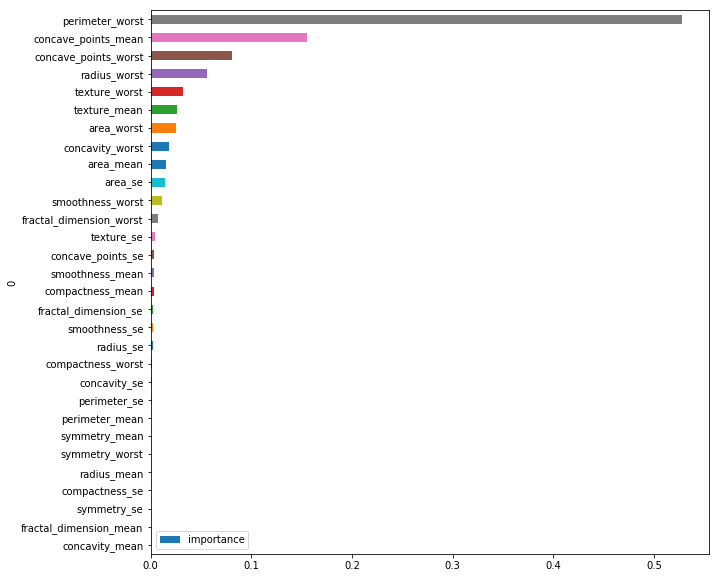

In [28]:
df_importance.plot(kind='barh', x=0, y='importance', figsize = (10,10))

# Questão 02)

### Passo 01: Pegar valores

In [29]:
dataset2 = transito.values[:, 1:]

In [30]:
inertias = []
for k in range(1,21):
    cluster = KMeans(n_clusters=k, random_state=42)
    cluster.fit(dataset2)
    inertias.append(cluster.inertia_)

In [31]:
x = np.arange(1,21)

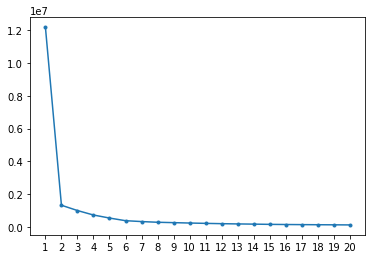

In [32]:
#A inertia é uma medida da distância aos centroids.
plt.plot(x,inertias, '.-');
plt.xticks(x);

Conforme podemos observar, o cotovelo está para k = 2. Dessa forma, usaremos esse valor.

In [33]:
cluster = KMeans(n_clusters=2, random_state=42)
result = cluster.fit(dataset2)

In [34]:
cluster.inertia_

1316420.8509477186

In [35]:
cluster.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [36]:
centroides = cluster.cluster_centers_
centroides

array([[ 50.04763437,   8.82875   ],
       [180.017075  ,  18.29      ]])

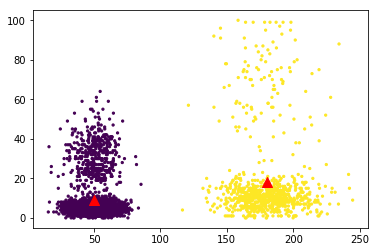

In [37]:
plt.scatter(dataset2[:,0], dataset2[:,1], s=5, c=cluster.labels_);
plt.scatter(centroides[:,0], centroides[:,1], marker='^', c='r', s=100);

# Questão 03)

In [38]:
distance_matrix = scipy.spatial.distance.pdist(dataset2, metric='euclidean')

In [52]:
np.mean(distance_matrix)

54.27497122043435

In [53]:
np.max(distance_matrix)

234.9170066214875

In [54]:
np.min(distance_matrix)

0.0

In [55]:
np.std(distance_matrix)

56.10761109658819

In [39]:
cluster_model = scipy.cluster.hierarchy.complete(distance_matrix)

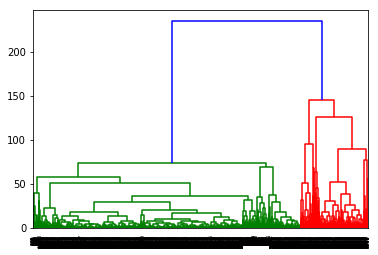

In [40]:
dendogram = scipy.cluster.hierarchy.dendrogram(cluster_model)

In [41]:
cluster_list = scipy.cluster.hierarchy.cut_tree(cluster_model, n_clusters=2)

In [42]:
cluster_list = cluster_list.reshape((4000,))

In [43]:
#Clusters em que cada amostra está
cluster_list.shape

(4000,)

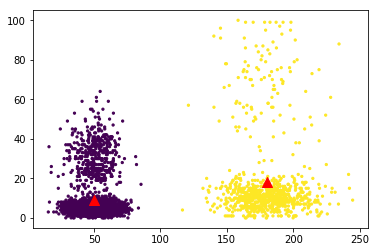

In [44]:
plt.scatter(dataset2[:,0], dataset2[:,1], s=5, c=cluster_list);
plt.scatter(centroides[:,0], centroides[:,1], marker='^', c='r', s=100);

# Questão 04)

In [68]:
clustering = DBSCAN(eps=30, min_samples=50).fit(dataset2)
y = clustering.labels_

In [69]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [71]:
#os -1 são os outliers
np.unique(y)

array([-1,  0,  1])

In [73]:
#Máscara
(y == -1)

array([False, False, False, ..., False, False, False])

In [77]:
out_v = dataset2[y == -1]
out_v

array([[234.52,  88.  ],
       [121.07,  57.  ]])

In [78]:
y_out = y[y == -1]
y_out

array([-1, -1])

In [62]:
centroides = clustering.core_sample_indices_
centroides

array([   0,    1,    2, ..., 3997, 3998, 3999])

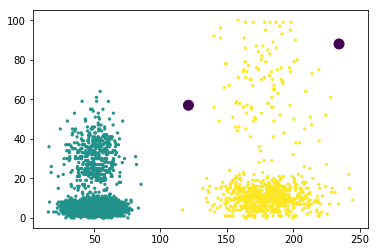

In [81]:
plt.scatter(dataset2[:,0], dataset2[:,1], s=5, c=clustering.labels_);
plt.scatter(out_v[:,0], out_v[:, 1], s=100, c=y_out)
#plt.scatter(centroides[:,0], centroides[:,1], marker='^', c='r', s=100);

Podemos fazer um classificador usando os resultados de uma clusterização. Ou seja, dada uma clusterização, em que temos as amostras e os labels como resultados, podemos usá-los para treinar um classificador.